<a href="https://colab.research.google.com/github/raquelvargas16/MIAR-Python-Activities/blob/develop/ActividadFinalPython_RaquelVargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install folium

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [ ]:
# Configuraciones para desplegar todas las columnas
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
def create_ec_map(data, columns, legend_name, **kwargs):
    f = open('./data/provs-ec.json')
    ec_geo = json.load(f)
    f.close()
    ec_map = folium.Map(location=[-1.831239, -78.183403], zoom_start=7, tiles='CartoDB Positron')
    folium.Choropleth(
    geo_data=ec_geo,
    data=data,
    columns=columns,
    key_on='feature.properties.dpa_despro',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=legend_name,
    nan_fill_color='white',
    reset=True,
    ).add_to(ec_map)
    return ec_map

In [ ]:
def plot_corr_matrix(data, cols):
    corr_matrix = round(data[cols].corr(), 2)
    plt.figure(figsize=(10,10))
    sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
    plt.show()

## Objetivo General
Analizar al sector empresarial del Ecuador en el período de 2008 a 2022.
### Objetivos específicos
* Calcular estadísticos descriptivos.
* Hacer un análisis histórico del total de ventas respecto al total de empresas y total de empleados.
* Hacer un análisis geográfico por provincia de las compañías activas en el último año.
* Determinar la cantidad de empleados promedio que tienen las empresas por provincia.
* Estudiar las variaciones en ventas y empleados en el período de tiempo.
* Determinar si existen clústeres naturales en el conjunto de empresas tipo PYME.

Link al notebook: https://drive.google.com/file/d/1DbSVc4jf21fg1dKRB12ba2DVxy4edseE/view?usp=sharing

Link en GitHub: https://github.com/raquelvargas16/MIAR-Python-Activities/blob/main/ActividadFinalPython_RaquelVargas.ipynb

## Cargar datos

### Características de los datos

Se utilizarán dos conjuntos de datos públicos con información de empresas ecuatorianas disponibles en el portal de información de la Superintendencia de Compañias y Seguros del Ecuador.

**bi_ranking.csv**

El primer conjunto de datos se llama "bi_ranking.csv" y contiene información financiera histórica de las empresas ecuatorianas desde 2008 hasta 2022. Este archivo se puede descargar desde este [link](https://appscvsmovil.supercias.gob.ec/ranking/recursos/bi_ranking.csv).

También se puede encontrar más información acerca de las variables en este conjunto de datos en el siguiente [link](https://appscvsmovil.supercias.gob.ec/ranking/reporte.html).

**directorio_companias.xlsx**

En ese conjunto de datos se encuentra más información descriptiva de la empresa como por ejemplo, su nombre, situación legal, país, región, provincia, cuidad, etc.
Este conjunto de datos se encuentra disponible en el siguiente [link](https://mercadodevalores.supercias.gob.ec/reportes/directorioCompanias.jsf)

In [ ]:
df_ranking_indicadores = pd.read_csv("./data/bi_ranking.csv", low_memory=False)

In [ ]:
df_directorio_empresas = pd.read_excel("./data/directorio_companias.xlsx", skiprows=4)

C:\Users\USUARIO\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Calcular estadísticos descriptivos

In [ ]:
df_ranking_indicadores.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
anio,1308913.00,NaN,NaN,NaN,2015.22,4.91,2008.00,2010.00,2016.00,2020.00,2022.00
expediente,1308913.00,NaN,NaN,NaN,207097.33,218996.88,1.00,72580.00,131925.00,181341.00,753516.00
posicion_general,1026248.00,NaN,NaN,NaN,36614.58,23831.87,1.00,17105.00,34209.00,52008.00,105452.00
cia_imvalores,1308913.00,NaN,NaN,NaN,0.00,0.07,0.00,0.00,0.00,0.00,1.00
id_estado_financiero,1026248.00,NaN,NaN,NaN,1503342.57,458733.58,16.00,1214139.75,1558186.50,1863550.25,2186009.00
ingresos_ventas,1308913.00,NaN,NaN,NaN,1110951.55,15515496.22,-1473502499.09,0.00,0.00,120703.84,4519276267.12
activos,1308913.00,NaN,NaN,NaN,1129031.19,15209240.83,-35477.02,0.00,5000.00,148712.65,2480403867.05
patrimonio,1308913.00,NaN,NaN,NaN,474639.02,8312189.91,-372186303.38,0.00,937.11,33437.65,1680022314.60
utilidad_an_imp,1308913.00,NaN,NaN,NaN,2711370631.69,1499861343790.71,-266063380000002.00,0.00,0.00,1024.62,828010499999992.00
impuesto_renta,1308913.00,NaN,NaN,NaN,94498.01,75374456.15,-1353085.03,0.00,0.00,238.72,85936766375.00


Se puede observar que este conjunto de datos cuenta con más de 1.3 millones de registros. De los resultados de este análisis descriptivo podemos deducir que en total en los últimos 14 años ha habido en promedio 207,097 empresas en Ecuador.

El promedio de empleados en estos 14 años ha sido de 20 y como es normal, existe una gran asimetría en cuando a la cantidad de ingresos por ventas que han tenido las empresas. Si nos fijamos en el promedio y la mediana de la columna **ingresos_ventas**, notamos que existe una gran diferencia entre ambas, porque el promedio de esta variable es 1.1 millones de dólares mientras que la mediana aparece en 0 dólares.

In [ ]:
df_directorio_empresas.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
No. FILA,197409.00,NaN,NaN,NaN,98705.00,56987.21,1.00,49353.00,98705.00,148057.00,197409.00
EXPEDIENTE,197409.00,NaN,NaN,NaN,336582.74,253759.29,1.00,133094.00,310200.00,702631.00,753615.00
RUC,190920,190898,1391933165001,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOMBRE,197409,197370,"ENGINEERING, VENTILATION, AIR CONDITIONING AND ELECTRICAL PROTECTIONS EVACEP S.A.S.",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITUACIÓN LEGAL,197409,13,ACTIVA,154352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FECHA_CONSTITUCION,197409,13681,10/05/2023,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO,197409,9,ANÓNIMA,101679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAÍS,197409,66,ECUADOR,196047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGIÓN,197409,4,COSTA,100362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROVINCIA,197409,24,GUAYAS,78021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este conjunto de datos, tenemos más variables de tipo categórico. Podemos notar que la mayoría de las empresas son de tipo Anónima. La mayoría de empresas se radican en la región Costa y específicamente en la cuidad de Guayaquil.

### Revisión de datos inconsistentes

In [ ]:
print(df_ranking_indicadores[df_ranking_indicadores["ingresos_ventas"]<0].shape[0])
df_ranking_indicadores.loc[df_ranking_indicadores["ingresos_ventas"]<0, ['anio', 'expediente', 'posicion_general', "ingresos_ventas"]]

7


,anio,expediente,posicion_general,ingresos_ventas
552944,2011,49113,668.00,-480265.30
604424,2012,40590,37351.00,-51.88
658115,2013,69383,29905.00,-45.36
694968,2014,4238,55056.00,-516291626.47
798967,2015,177150,60980.00,-134906.60
852236,2016,157313,22821.00,-200352.96
876821,2017,407,72765.00,-1473502499.09


In [ ]:
print(df_ranking_indicadores[df_ranking_indicadores["n_empleados"]<0].shape[0])
df_ranking_indicadores.loc[df_ranking_indicadores["n_empleados"]<0, ['anio', 'expediente', 'posicion_general', "n_empleados"]]

1


,anio,expediente,posicion_general,n_empleados
604289,2012,39950,22992.00,-1.00


In [ ]:
print(df_ranking_indicadores[df_ranking_indicadores["impuesto_renta"]<0].shape[0])
df_ranking_indicadores.loc[df_ranking_indicadores["impuesto_renta"]<0, ['anio', 'expediente', 'posicion_general', "impuesto_renta"]]

10


,anio,expediente,posicion_general,impuesto_renta
311691,2020,3215,23.00,-1353085.03
383242,2019,91006,9381.00,-23183.95
385532,2019,126670,11671.00,-5294.25
498343,2010,39301,570.00,-2.05
554412,2011,43208,347.00,-807852.52
643377,2012,165741,37128.00,-15146.32
770740,2015,105108,47080.00,-1975.20
834041,2016,105108,50483.00,-168.64
898092,2017,105108,57236.00,-1409.38
984847,2018,152342,2886.00,-155904.94


Para facilitar el análisis, se procede a reescribir con 0 los valores negativos en las columnas: número de empleados, impuesto a la renta e ingresos por ventas.

In [ ]:
df_ranking_indicadores.loc[df_ranking_indicadores["impuesto_renta"]< 0, "impuesto_renta"] = 0
df_ranking_indicadores.loc[df_ranking_indicadores["n_empleados"]< 0, "n_empleados"] = 0
df_ranking_indicadores.loc[df_ranking_indicadores["ingresos_ventas"]< 0, "ingresos_ventas"] = 0

df_ranking_indicadores.shape

(1308913, 54)

## Análisis histórico del total de ventas respecto al total de empresas y total de empleados

Para elaborar este análisis primero se seleccionarán las columnas de interés y se eliminarán los datos perdidos.

In [ ]:
df_historico_indicadores = df_ranking_indicadores[['anio',
                                                   'ingresos_ventas',
                                                   'n_empleados']].dropna()
df_historico_indicadores.shape

(1308913, 3)

In [ ]:
df_conteo_anual_empresas = df_historico_indicadores.groupby('anio')[['ingresos_ventas']].agg('count').reset_index()
df_conteo_anual_empresas.columns =  ["anio", "total_empresas"]

In [ ]:
df_agregados_anuales = df_historico_indicadores.groupby('anio').agg('sum').reset_index()

In [ ]:
df_agregados_anuales = df_agregados_anuales.merge(df_conteo_anual_empresas, on="anio")

In [ ]:
df_agregados_anuales

,anio,ingresos_ventas,n_empleados,total_empresas
0,2008,91643476334.67,2136045.00,137705
1,2009,91158659034.33,3117443.00,144785
2,2010,9921576002.17,1191047.00,66123
3,2011,55072618902.11,1313004.00,72028
4,2012,89558610537.97,948009.00,44759
5,2013,100398909418.97,1064112.00,50069
6,2014,105907105987.57,1207351.00,55765
7,2015,104868918238.50,1270426.00,61274
8,2016,98481559140.74,1668494.00,66680
9,2017,111317181451.08,2404019.00,73733


Text(0, 0.5, 'Total Ventas')

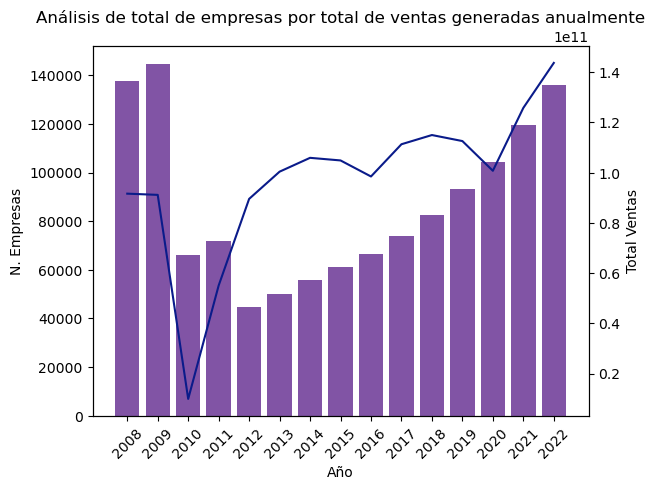

In [ ]:
ax = sns.barplot(x=df_agregados_anuales["anio"], y=df_agregados_anuales["total_empresas"], color="#8346b3")
ax2 = plt.twinx()
sns.lineplot(data=df_agregados_anuales["ingresos_ventas"], color="#0a1b8a", ax=ax2)
ax.tick_params(axis='x', rotation=45)
ax.set_title("Análisis de total de empresas por total de ventas generadas anualmente")
ax.set_xlabel("Año")
ax.set_ylabel("N. Empresas")
ax2.set_ylabel("Total Ventas")

Text(0, 0.5, 'Total Ingresos por ventas')

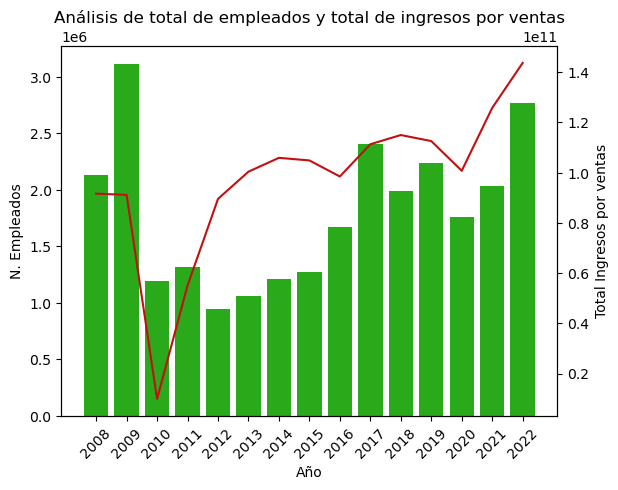

In [ ]:
ax = sns.barplot(x=df_agregados_anuales["anio"], y=df_agregados_anuales["n_empleados"], color="#18c202")
ax2 = plt.twinx()
sns.lineplot(data=df_agregados_anuales["ingresos_ventas"], color="#c21010", ax=ax2)
ax.tick_params(axis='x', rotation=45)
ax.set_title("Análisis de total de empleados y total de ingresos por ventas")
ax.set_xlabel("Año")
ax.set_ylabel("N. Empleados")
ax2.set_ylabel("Total Ingresos por ventas")

Los gráficos anteriores son bastante interesantes porque se pueden notar las diferentes crisis económicas que ha atravesado el Ecuador en los últimos 14 años mirando la tendencia de la serie del total ventas.

Notamos que existen tres caídas en las ventas de las empresas en los siguientes años: 2010, 2016 y 2020.

**Crisis del 2020**
El 30 de septiembre de 2010 el Ecuador sufrió una grave crisis política que inició como una protesta policial. Aunque el amotinamiento de las fuerzas policiales fue de unas 6 horas, este único hecho provocó una fuerte crisis porque se llegó a insinuar un golpe de estado. Años más tarde también podemos comprobar que esta crisis también impactó en el sector empresarial del país.

Más información se puede encontrar en este [artículo de prensa](https://www.bbc.com/mundo/noticias/2010/10/101001_0436_ecuador_crisis_medios_ao)

**Terremoto del 2016**
El 16 de abril del 2016 un terremoto de 7.8 grados ocurrió en la zona de Pedernales en Manabí. Consecuentemente, ese evento causó una fuerte crisis humanitaria y económica porque se vieron afectados muchos edificios y muchas zonas del Ecuador se quedaron sin servicios básicos por unos días.

Más información en el siguiente ¨[enlace](https://en.wikipedia.org/wiki/2016_Ecuador_earthquake)

**Pandemia de Covid-19**
Finalmente, la última caída se ve durante la pandemia de Covid-19 en 2020. Es la crisis más reciente que ha experimentado el Ecuador.

## Análisis geográfico por provincia de las compañías activas en el último año

In [ ]:
df_empresas_por_provincia = (df_directorio_empresas
                             .loc[df_directorio_empresas['SITUACIÓN LEGAL'] == 'ACTIVA', ['RUC', 'PROVINCIA']]
                             .groupby('PROVINCIA')['RUC'].agg('count').reset_index())
df_empresas_por_provincia.replace({'CAÑAR': 'CANAR'}, inplace=True)

In [ ]:
df_empresas_por_provincia.sort_values(by='RUC', ascending=False)

,PROVINCIA,RUC
9,GUAYAS,57177
18,PICHINCHA,48779
0,AZUAY,7657
13,MANABI,6811
6,EL ORO,4892
22,TUNGURAHUA,2846
12,LOS RIOS,2355
20,SANTO DOMINGO DE LOS TSACHILAS,2169
11,LOJA,2090
10,IMBABURA,2032


In [ ]:
escala_colores = [366, 1001, 2032, 4892, 7657, 57177]
create_ec_map(data=df_empresas_por_provincia,
              columns=['PROVINCIA', 'RUC'],
              legend_name='Total de Empresas',
              bins=escala_colores,)

El mapa muestra que las provincias con mayor concentración de empresas son Guayas y Pichincha.

In [ ]:
df_empresas_por_provincia_filtered = df_empresas_por_provincia[~df_empresas_por_provincia['PROVINCIA']
                                                               .isin(['GUAYAS', 'PICHINCHA'])]
create_ec_map(data=df_empresas_por_provincia_filtered,
              legend_name='Total de Empresas',
              columns=['PROVINCIA', 'RUC'])

Eliminando a Guayas y Pichicha, notamos que las provincias de Manabí y Azuay son las siguientes en concentrar la mayor cantidad de empresas.

## Determinar la cantidad de empleados promedio que tienen las empresas por provincia

In [ ]:
# Filtramos el último año y hacemos join con el directorio de empresas
df_empresas_empleados_provincia = df_ranking_indicadores[df_ranking_indicadores['anio']==2022]
df_empresas_empleados_provincia = (df_empresas_empleados_provincia[['anio', 'expediente', 'n_empleados']]
                                   .merge(df_directorio_empresas
                                          .loc[df_directorio_empresas['SITUACIÓN LEGAL'] == 'ACTIVA',
                                               ['EXPEDIENTE', 'PROVINCIA', 'RUC', 'NOMBRE', 'FECHA_CONSTITUCION']],
                                          left_on='expediente',
                                          right_on='EXPEDIENTE'))
df_empresas_empleados_provincia = df_empresas_empleados_provincia.drop('EXPEDIENTE', axis=1)
df_empresas_empleados_provincia.sort_values(by='n_empleados', ascending=False).head()

,anio,expediente,n_empleados,PROVINCIA,RUC,NOMBRE,FECHA_CONSTITUCION
98877,2022,334970,1020304.00,CHIMBORAZO,0691784590001,CENTRO DE APRENDISAJE Y CAPACITACION CENAPRECAP S.A.S.,15/05/2022
65405,2022,721711,100003.00,GUAYAS,0993178950001,SORIANO&ASOCIADOS S.A.,31/01/2019
2,2022,22576,15598.00,GUAYAS,0991257721001,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,09/11/1973
0,2022,384,10966.00,PICHINCHA,1790016919001,CORPORACION FAVORITA C.A.,30/11/1957
13,2022,3502,8369.00,GUAYAS,0990017514001,TIENDAS INDUSTRIALES ASOCIADAS TIA S.A.,01/02/1960


Vemos que la empresa con número de expediente 334970 de la provincia de Chimborazo tiene más de un millón de empleados. Este valor es un outlier y es muy probable que sea un error porque:
1. El tiempo de constitución de la empresa es demasiado corto
2. Se trata de un tipo de centro de capacitación que no necesariamente debería tener tantos empleados
3. El total de empleados de esta empresa es más del doble de habitantes en esa provincia (471,933 habitantes)

Por las razones anteriores, se procede a reemplazar número de empleados en esa empresa por la mediana de empleados en la provincia de Chimborazo.

In [ ]:
df_mediana_empleados_chimborazo = (df_empresas_empleados_provincia
                                   .loc[df_empresas_empleados_provincia['PROVINCIA'] == 'CHIMBORAZO', 'n_empleados']
                                   .median())
df_empresas_empleados_provincia.loc[df_empresas_empleados_provincia['expediente'] == 334970, 'n_empleados'] = df_mediana_empleados_chimborazo

In [ ]:
df_empresas_empleados_provincia.sort_values(by='n_empleados', ascending=False).head()

,anio,expediente,n_empleados,PROVINCIA,RUC,NOMBRE,FECHA_CONSTITUCION
65405,2022,721711,100003.00,GUAYAS,0993178950001,SORIANO&ASOCIADOS S.A.,31/01/2019
2,2022,22576,15598.00,GUAYAS,0991257721001,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,09/11/1973
0,2022,384,10966.00,PICHINCHA,1790016919001,CORPORACION FAVORITA C.A.,30/11/1957
13,2022,3502,8369.00,GUAYAS,0990017514001,TIENDAS INDUSTRIALES ASOCIADAS TIA S.A.,01/02/1960
7,2022,7154,7423.00,PICHINCHA,1790319857001,PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA,18/05/1977


In [ ]:
df_empresas_empleados_provincia_grouped = (df_empresas_empleados_provincia
                                           .groupby('PROVINCIA')
                                           .agg({'n_empleados':'sum', 'expediente':'count'}).reset_index())
df_empresas_empleados_provincia_grouped['empleados_x_provincia'] = (df_empresas_empleados_provincia_grouped['n_empleados']
                                                            / df_empresas_empleados_provincia_grouped['expediente'])
df_empresas_empleados_provincia_grouped.sort_values(by='empleados_x_provincia', ascending=False).head()

,PROVINCIA,n_empleados,expediente,empleados_x_provincia
9,GUAYAS,755550.00,51711,14.61
18,PICHINCHA,598776.00,43471,13.77
5,COTOPAXI,19128.00,1582,12.09
13,MANABI,71652.00,6093,11.76
6,EL ORO,49834.00,4389,11.35


In [ ]:
create_ec_map(data=df_empresas_empleados_provincia_grouped,
              columns=['PROVINCIA', 'empleados_x_provincia'],
              legend_name='Empleados Promedio')

Este gráfico nos muestra que además de las tres provincias principales: Pichincha, Guayas y Manabí, las empresas de la provincia de Cotopaxi también contratan a bastates empleados, en promedio 13 empleados por empresa.

## Estudiar las variaciones en ventas y empleados en el período de tiempo

In [ ]:
# Variación de empleados
df_variacion_empleados = (df_ranking_indicadores
 .sort_values(['anio', 'expediente'])
 .set_index('anio').groupby('expediente')
 .apply(lambda x: x['n_empleados'].diff()).reset_index())

#Variación en ventas
df_variacion_ventas = (df_ranking_indicadores
 .sort_values(['anio', 'expediente'])
 .set_index('anio').groupby('expediente')
 .apply(lambda x: x['ingresos_ventas'].diff()).reset_index())

In [ ]:
df_variacion_empleados.columns = ['expediente', 'anio', 'dif_empleados_anio_pasado']
df_variacion_ventas.columns = ['expediente', 'anio', 'dif_ventas_anio_pasado']

In [ ]:
df_variaciones_anuales = (df_variacion_empleados
                          .merge(df_ranking_indicadores[['expediente', 'anio','n_empleados', 'ingresos_ventas']],
                                 on=['expediente', 'anio'])
                         .merge(df_variacion_ventas, on=['expediente', 'anio']))

In [ ]:
df_variaciones_anuales.columns

Index(['expediente', 'anio', 'dif_empleados_anio_pasado', 'n_empleados',
       'ingresos_ventas', 'dif_ventas_anio_pasado'],
      dtype='object')

In [ ]:
df_variaciones_anuales['pct_variacion_empleados'] = (df_variaciones_anuales['dif_empleados_anio_pasado']
                                                    / df_variaciones_anuales['n_empleados'])
df_variaciones_anuales['pct_variacion_ventas'] = (df_variaciones_anuales['dif_ventas_anio_pasado']
                                                    / df_variaciones_anuales['ingresos_ventas'])
df_variaciones_anuales = df_variaciones_anuales.dropna()

In [ ]:
df_variaciones_anuales.describe()

,expediente,anio,dif_empleados_anio_pasado,n_empleados,ingresos_ventas,dif_ventas_anio_pasado,pct_variacion_empleados,pct_variacion_ventas
count,616173.00,616173.00,616173.00,616173.00,616173.00,616173.00,616173.00,616173.00
mean,204724.07,2017.00,0.94,27.28,2199349.40,83716.02,-inf,-inf
std,211624.00,3.79,786.15,698.38,21770165.67,10730845.33,NaN,NaN
min,1.00,2009.00,-300992.00,0.00,0.00,-3985052211.65,-inf,-inf
25%,84632.00,2014.00,-1.00,3.00,10230.76,-44290.90,-0.25,-0.72
50%,139074.00,2018.00,0.00,5.00,112772.32,1246.70,0.00,0.04
75%,178109.00,2020.00,2.00,10.00,586053.48,82876.60,0.25,0.54
max,747911.00,2022.00,300995.00,300997.00,4519276267.12,4092680454.49,1.00,1.00


In [ ]:
df_variaciones_anuales = df_variaciones_anuales.replace([np.inf, -np.inf], np.nan)
df_variaciones_anuales = df_variaciones_anuales.dropna()
df_variaciones_anuales.shape

(530451, 8)

In [ ]:
df_variaciones_anuales_grouped = (df_variaciones_anuales
                                  .groupby('anio')[['pct_variacion_empleados', 'pct_variacion_ventas']]
                                  .median().reset_index())
df_variaciones_anuales_grouped

,anio,pct_variacion_empleados,pct_variacion_ventas
0,2009,0.00,0.10
1,2010,0.10,-0.05
2,2011,0.02,1.00
3,2012,0.00,1.00
4,2013,0.00,0.13
5,2014,0.00,0.11
6,2015,0.00,0.07
7,2016,0.00,0.00
8,2017,0.20,0.11
9,2018,0.00,0.09


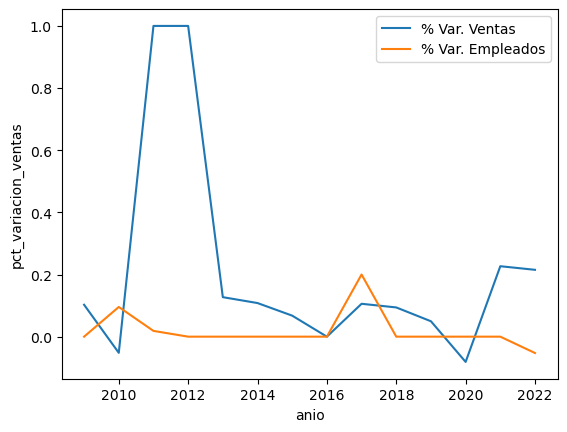

In [ ]:
sns.lineplot(x=df_variaciones_anuales_grouped["anio"],
             y=df_variaciones_anuales_grouped["pct_variacion_ventas"], label='% Var. Ventas')

sns.lineplot(x=df_variaciones_anuales_grouped["anio"],
             y=df_variaciones_anuales_grouped["pct_variacion_empleados"], label='% Var. Empleados')
plt.legend()
plt.show()

Este gráfico nos muestra que la mayor contratación de empleados por parte de las empresas privadas en el Ecuador se dió en el año 2017.

En cuanto a la mayor variación de ventas, esta se dio entre los años 2011 y 2012.

### Modelo de segmentación de PYMEs

Se elaborará un modelo de segmentación de las empresas consideradas como PYME. Para este análisis se considerará como PYME a toda empresa que tenga ingresos por ventas de entre 100.000 y 5'000.000 USD.

In [ ]:
cond_ventas = ((df_ranking_indicadores['ingresos_ventas'] >= 100000)
               & (df_ranking_indicadores['ingresos_ventas'] <= 5000000))
cond_anio = df_ranking_indicadores['anio'] == 2022

In [ ]:
df_pymes = df_ranking_indicadores.loc[cond_ventas &
                                      cond_anio, :]
print(df_pymes.shape)

(30968, 54)


In [ ]:
df_pymes[['n_empleados', 'liquidez_corriente', 'prueba_acida', 'end_activo',
       'end_patrimonial', 'end_activo_fijo', 'end_corto_plazo']].describe(percentiles=[.01, .05, .25, .75, .90, .99])

,n_empleados,liquidez_corriente,prueba_acida,end_activo,end_patrimonial,end_activo_fijo,end_corto_plazo
count,30968.00,30968.00,30968.00,30968.00,30968.00,30968.00,30968.00
mean,12.71,29.39,27.71,0.71,17.69,48629.04,0.76
std,27.58,2224.97,2221.66,7.94,307.45,6225743.36,1.00
min,1.00,0.00,-1503.34,0.00,0.00,0.00,0.00
1%,1.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,2.00,0.13,0.06,0.04,0.04,0.00,0.04
25%,4.00,0.96,0.63,0.37,0.59,0.03,0.52
50%,5.00,1.44,1.17,0.66,1.91,0.94,0.94
75%,11.00,2.84,2.36,0.87,5.80,3.75,1.00
90%,26.00,7.21,6.30,0.98,18.72,18.50,1.00


Las fórmulas de cálculo de los ratios se encuentran disponibles en el siguiente link: [CONCEPTO Y FÓRMULA DE LOS INDICADORES](file:///C:/Users/USUARIO/Documents/Master%20Inteligencia%20Artificial/Python%20para%20la%20IA/ActividadFinal/referencia_indicadores.pdf).

Para elegir las variables que entraran al modelo, se realizarán análisis de correlación por grupo de ratio. Los ratios financieros se pueden agrupar en:
* Indicadores de Liquidez
* Indicadores de Solvencia
* Indicadores de Gestión
* Indicadores de Rentabilidad

### Ratios de liquidez

Solo se dispone de dos ratios de liquidez, estos son: Liquidez Corriente y Prueba Ácida. Estos ratios se encuentran altamente correlacionados porque el numerador del ratio de prueba ácida es el mismo que el de liquidez corriente menos inventario, por esta razón solamente se elegirá la Prueba Ácida.

In [ ]:
ratios_liquidez_sel = ['prueba_acida']

### Ratios de solvencia

In [ ]:
ratios_solvencia = ['end_activo',
                    'end_patrimonial',
                    'end_activo_fijo',
                    'end_corto_plazo',
                    'end_largo_plazo',
                    'cobertura_interes',
                    'apalancamiento',
                    'apalancamiento_financiero',
                    'end_patrimonial_ct',
                    'end_patrimonial_nct',
                    'apalancamiento_c_l_plazo',
                    'fortaleza_patrimonial']

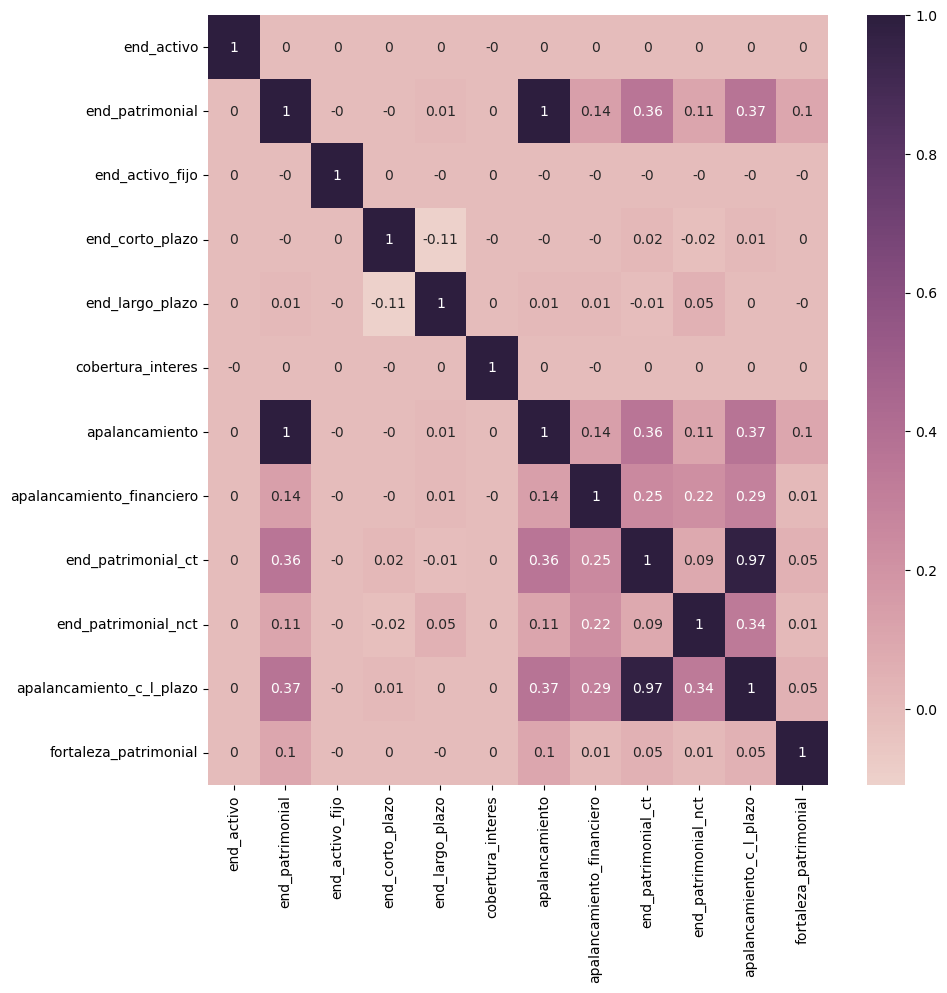

In [ ]:
plot_corr_matrix(df_pymes, ratios_solvencia)

Los ratios de solvencia seleccionados son:
* Endeudamiento del Activo
* Endeudamiento Patrimonial
* Endeudamiento a largo plazo
* Fortaleza Patrimonial

In [ ]:
ratios_solvencia_sel = ['end_activo',
                    'end_patrimonial',
                    'end_corto_plazo',
                    'end_largo_plazo',
                    'fortaleza_patrimonial']

In [ ]:
df_pymes[ratios_solvencia_sel].describe(percentiles=[.01, .25, .75, .9, .99]).T

,count,mean,std,min,1%,25%,50%,75%,90%,99%,max
end_activo,30968.00,0.71,7.94,0.00,0.00,0.37,0.66,0.87,0.98,1.94,1367.34
end_patrimonial,30968.00,17.69,307.45,0.00,0.00,0.59,1.91,5.80,18.72,224.54,43058.18
end_corto_plazo,30968.00,0.76,1.00,0.00,0.00,0.52,0.94,1.00,1.00,1.00,100.00
end_largo_plazo,30968.00,0.22,0.49,0.00,0.00,0.00,0.01,0.40,0.73,0.98,49.06
fortaleza_patrimonial,30968.00,0.53,24.10,0.00,0.00,0.00,0.03,0.19,0.68,3.50,4001.00


### Ratios de gestión

In [ ]:
ratios_gestion = ['rot_cartera',
                  'rot_activo_fijo',
                  'rot_ventas',
                  'per_med_cobranza',
                  'per_med_pago',
                  'impac_gasto_a_v',
                  'impac_carga_finan']

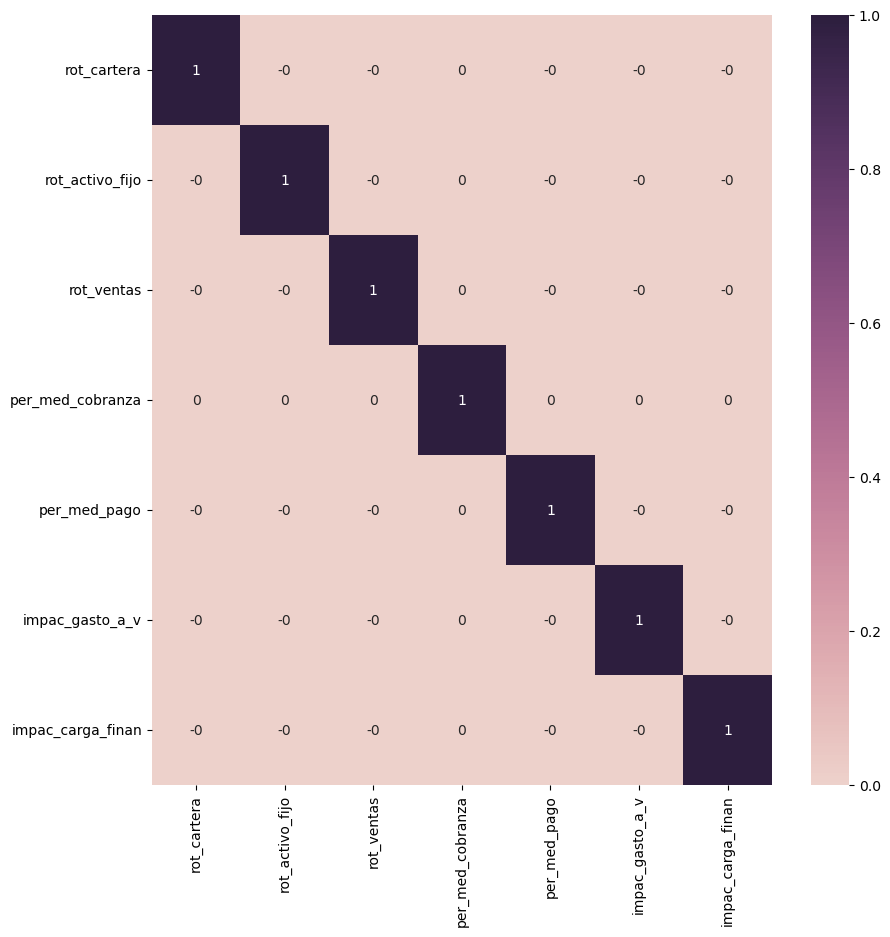

In [ ]:
plot_corr_matrix(df_pymes, ratios_gestion)

In [ ]:
df_pymes[ratios_gestion].describe(percentiles=[.01, .25, .75, .9, .99]).T

,count,mean,std,min,1%,25%,50%,75%,90%,99%,max
rot_cartera,30968.00,14401.28,2218125.49,0.00,0.00,0.99,4.32,12.04,39.19,687.28,388860330.00
rot_activo_fijo,30968.00,27897.47,1906965.84,0.00,0.00,0.16,4.26,22.78,114.68,2321.94,234607990.00
rot_ventas,30968.00,827.23,139849.24,0.00,0.04,0.79,1.54,2.92,5.68,35.87,24604944.00
per_med_cobranza,30968.00,-55273.07,13396489.45,-2274005495.68,-15.06,0.00,0.00,0.00,683.79,34935.06,602353625.38
per_med_pago,30968.00,4094042.26,621883656.06,0.00,0.00,0.00,0.00,7881.89,100621.82,2327695.45,109373888174.93
impac_gasto_a_v,30968.00,1.68,186.68,0.00,0.00,0.00,0.00,0.53,0.94,1.61,32067.21
impac_carga_finan,30968.00,0.02,0.07,0.00,0.00,0.00,0.00,0.01,0.03,0.28,4.09


Para simplificar el análisis solo se seleccionará a la rotación de ventas para el análisis.

In [ ]:
ratios_gestion_sel = ['rot_ventas']

In [ ]:
ratios_rentabilidad = ['rent_neta_activo',
                       'margen_bruto',
                       'margen_operacional',
                       'rent_neta_ventas',
                       'rent_ope_patrimonio',
                       'rent_ope_activo',
                       'roe',
                       'roa',]

### Ratios de rentabilidad

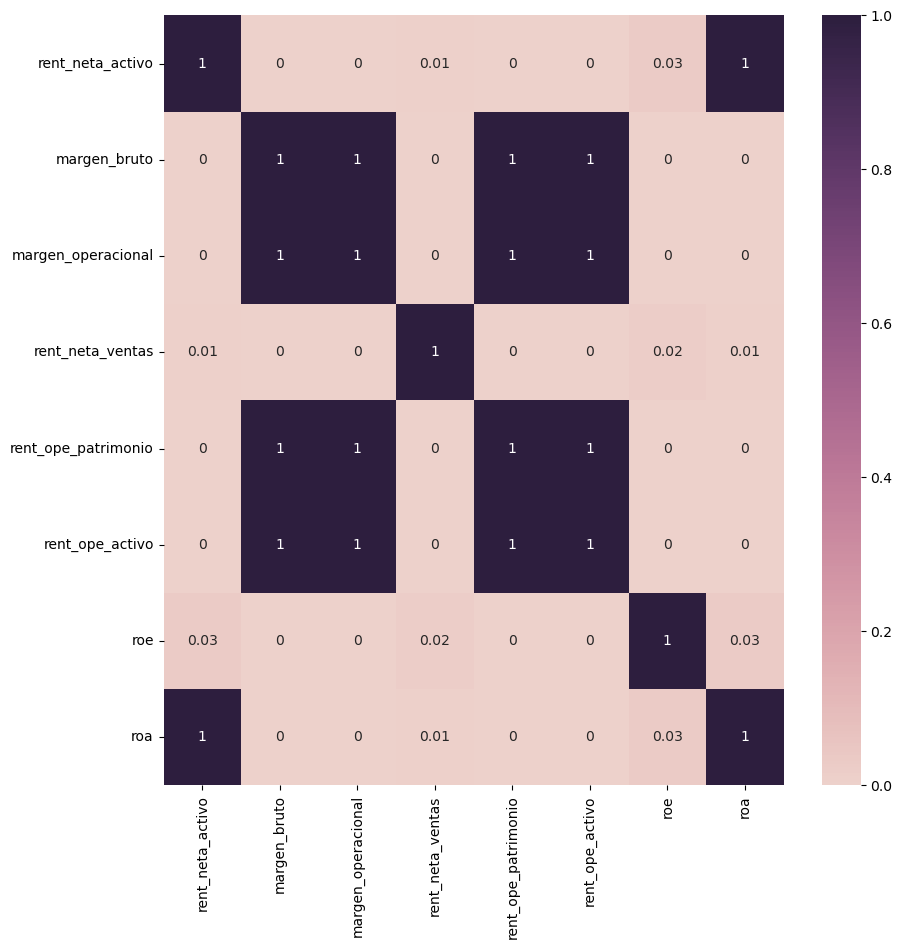

In [ ]:
plot_corr_matrix(df_pymes, ratios_rentabilidad)

In [ ]:
df_pymes[ratios_rentabilidad].describe(percentiles=[.01, .25, .75, .9, .99]).T

,count,mean,std,min,1%,25%,50%,75%,90%,99%,max
rent_neta_activo,30968.00,2.50,413.14,0.00,0.00,0.01,0.04,0.14,0.34,0.97,72702.61
margen_bruto,30968.00,-21402.62,3766477.03,-662814348.84,-0.11,0.26,0.58,1.00,1.00,1.00,1.00
margen_operacional,30968.00,-610168.89,110981448.78,-19525040770.53,-2891.07,0.00,0.00,0.00,47.34,13127.37,150000000.00
rent_neta_ventas,30968.00,0.11,0.48,0.00,0.00,0.00,0.03,0.08,0.24,0.99,39.56
rent_ope_patrimonio,30968.00,-141043.52,24711945.64,-4348696314.13,-132.68,-0.96,0.76,4.30,15.86,197.58,450000.00
rent_ope_activo,30968.00,-9107.63,1498257.95,-262915622.53,-10.64,-0.27,0.26,1.29,3.30,20.20,450000.00
roe,30968.00,0.67,10.57,0.00,0.00,0.05,0.19,0.53,0.96,5.33,1611.79
roa,30968.00,2.50,413.14,0.00,0.00,0.01,0.04,0.14,0.34,0.98,72702.61


Los ratios de rentabilidad seleccionados son:
* ROA
* ROE
* Margen Operacional
* Rentabilidad Neta de Ventas (Margen Neto)

In [ ]:
ratios_rentabilidad_sel = ['roe',
                           'roa',
                           'margen_operacional',
                           'rent_neta_ventas']

In [ ]:
ratios_seleccionados = (ratios_liquidez_sel
                        + ratios_solvencia_sel
                        + ratios_gestion_sel
                        + ratios_rentabilidad_sel)

Se calculará una última matriz de correlación utilizando todas las variables seleccionadas para identificar variables que se puedan eliminar del análisis por alta correlación.

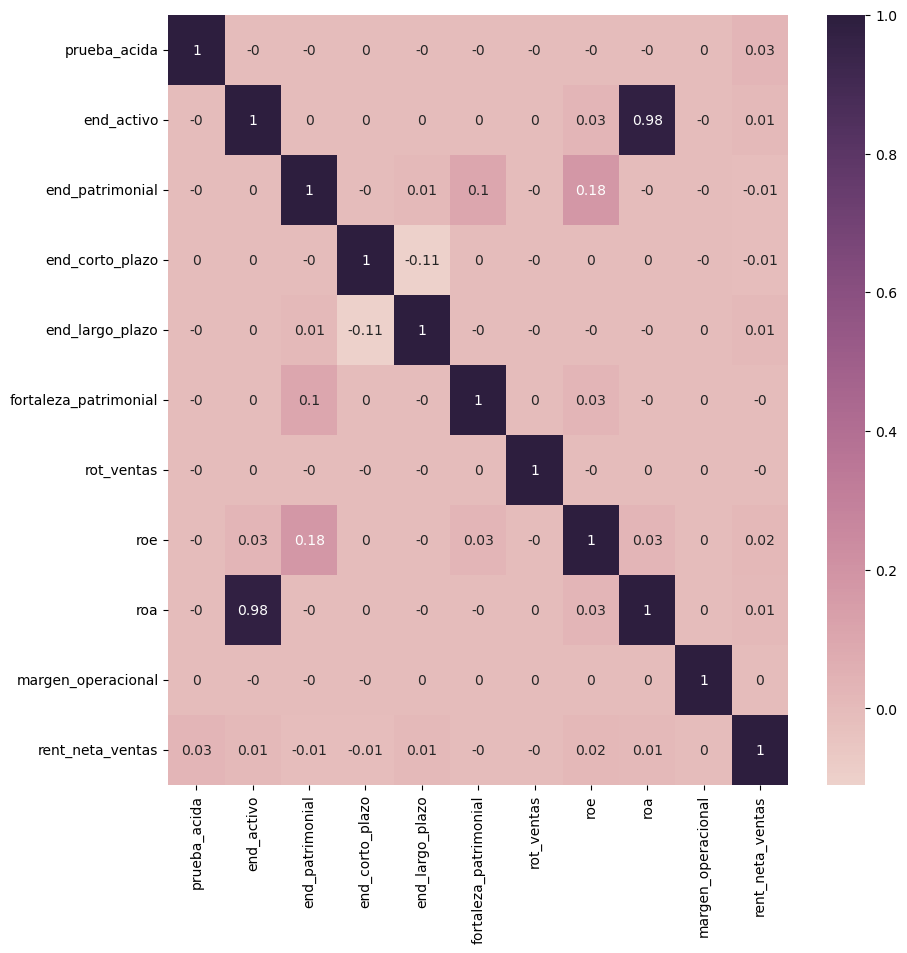

In [ ]:
plot_corr_matrix(df_pymes, ratios_seleccionados)

De los ratios seleccionados anteriormente se puede eliminar el endeudamiento del activo porque está altamente correlacionado con el ROA.

In [ ]:
ratios_seleccionados.remove('end_activo')

In [ ]:
print(ratios_seleccionados)

['prueba_acida', 'end_patrimonial', 'end_corto_plazo', 'end_largo_plazo', 'fortaleza_patrimonial', 'rot_ventas', 'roe', 'roa', 'margen_operacional', 'rent_neta_ventas']


### Tratamiento de valores extremos

Al estar trabajando con ratios, es normal que se encuentren valores muy extremos porque a veces los denominadores suelen ser muy pequeños. Entonces, se seleccionarán los valores que se encuentren entre los percentiles 1 y 99.

La idea es obtener un modelo con las empresas que tengan los ratios más estables. Además, es necesario tratar de controlar la asimetría de las distribuciones de las variables porque el algoritmo que se utilizará es el clustering con K-means y este algoritmo funciona mejor con variables que tiendan a tener una distribución simétrica y gaussiana.

In [ ]:
df_pymes[ratios_seleccionados].describe(percentiles=[.01, 0.05, .25, .75, .9, .95, .99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,95%,99%,max
prueba_acida,30968.00,27.71,2221.66,-1503.34,0.00,0.06,0.63,1.17,2.36,6.30,13.09,79.83,345316.69
end_patrimonial,30968.00,17.69,307.45,0.00,0.00,0.04,0.59,1.91,5.80,18.72,41.25,224.54,43058.18
end_corto_plazo,30968.00,0.76,1.00,0.00,0.00,0.04,0.52,0.94,1.00,1.00,1.00,1.00,100.00
end_largo_plazo,30968.00,0.22,0.49,0.00,0.00,0.00,0.00,0.01,0.40,0.73,0.87,0.98,49.06
fortaleza_patrimonial,30968.00,0.53,24.10,0.00,0.00,0.00,0.00,0.03,0.19,0.68,1.00,3.50,4001.00
rot_ventas,30968.00,827.23,139849.24,0.00,0.04,0.17,0.79,1.54,2.92,5.68,9.28,35.87,24604944.00
roe,30968.00,0.67,10.57,0.00,0.00,0.00,0.05,0.19,0.53,0.96,1.09,5.33,1611.79
roa,30968.00,2.50,413.14,0.00,0.00,0.00,0.01,0.04,0.14,0.34,0.58,0.98,72702.61
margen_operacional,30968.00,-610168.89,110981448.78,-19525040770.53,-2891.07,-96.07,0.00,0.00,0.00,47.34,320.77,13127.37,150000000.00
rent_neta_ventas,30968.00,0.11,0.48,0.00,0.00,0.00,0.00,0.03,0.08,0.24,0.48,0.99,39.56


In [ ]:
for c in ratios_seleccionados:
    min_lim = df_pymes[c].quantile(0.01)
    max_lim = df_pymes[c].quantile(0.99)
    df_pymes = df_pymes[(df_pymes[c] >= min_lim) & (df_pymes[c] <= max_lim)]
print(df_pymes.shape)

(27811, 54)


Se añadirá también la variable número de empleados al modelo.

In [ ]:
ratios_seleccionados.append('n_empleados')

In [ ]:
df_pymes_modelo = df_pymes[ratios_seleccionados]
print(df_pymes_modelo.shape)

(27811, 11)


### Transformación de variables

Para tratar la asimetría de las distribuciones de las variables se utilizará la transformación Yeo-Johnson.

In [ ]:
pt = PowerTransformer()
pt_fitted = pt.fit(df_pymes_modelo)
df_pymes_transform = pt_fitted.transform(df_pymes_modelo)

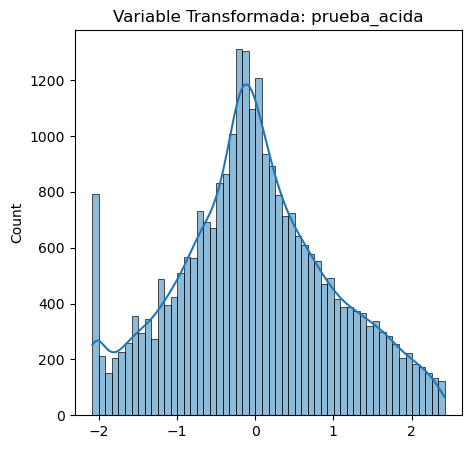

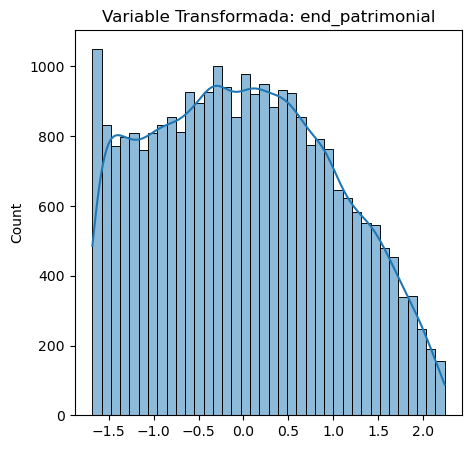

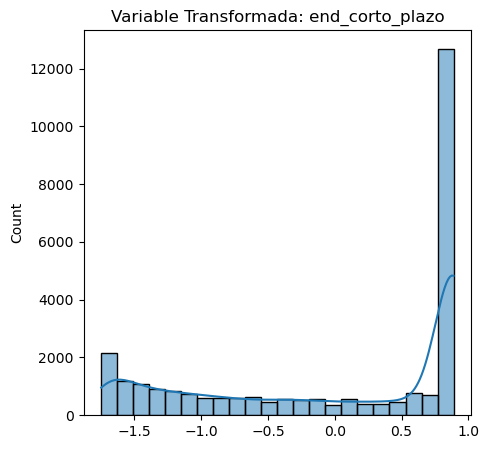

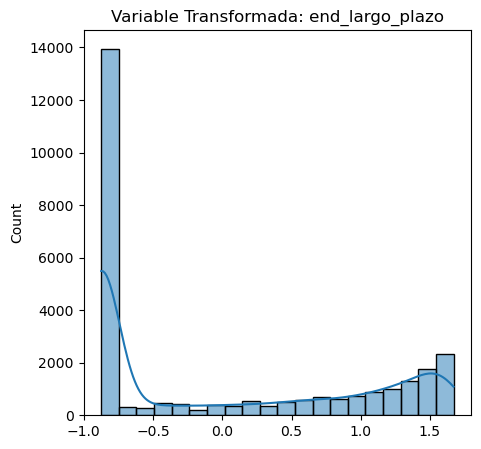

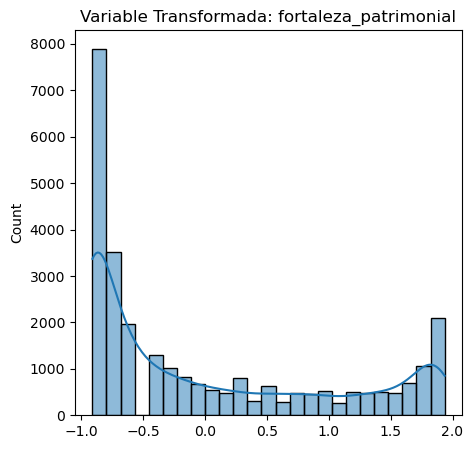

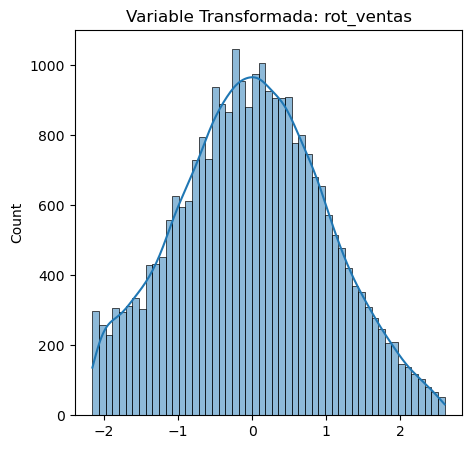

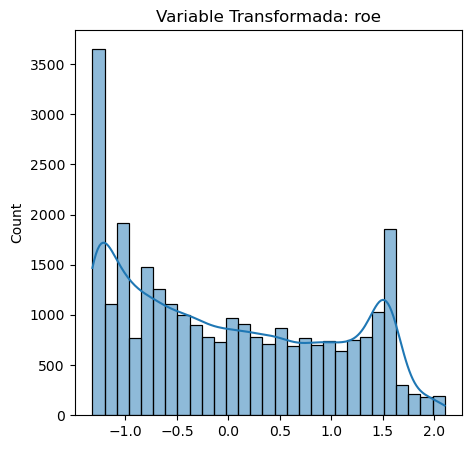

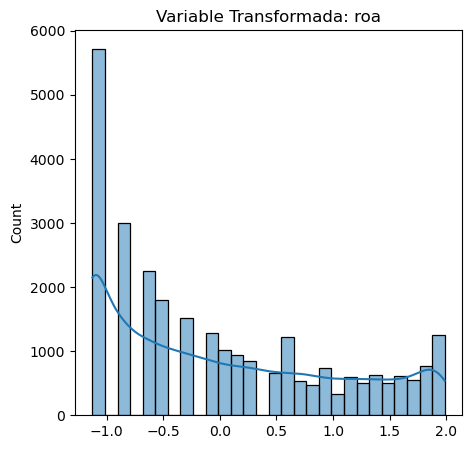

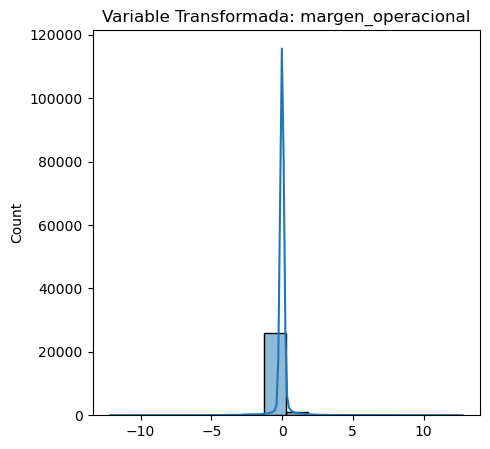

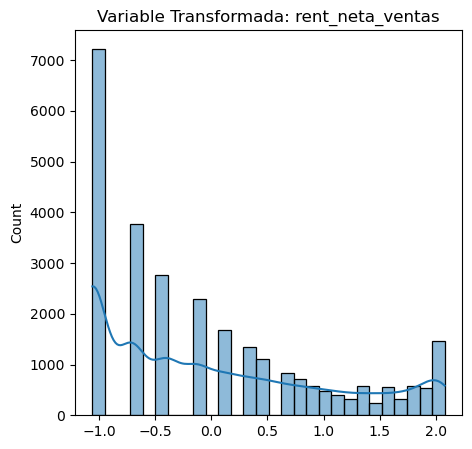

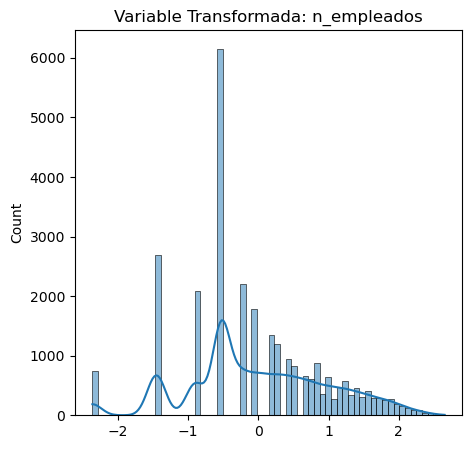

In [ ]:
for c in range(df_pymes_transform.shape[1]):
    plt.figure(figsize=(5,5))
    sns.histplot(df_pymes_transform[:, c], kde=True)
    plt.title("Variable Transformada: " + ratios_seleccionados[c])

De los histogramas anteriores se puede ver que solo las siguientes variables transformadas tienen una distribución casi gaussiana:
* Prueba Ácida
* Rotación de Ventas
* Número de empleados

### Escalado de variables

Para escalar las variables se utilizará la técnica de MinMax.

In [ ]:
df_pymes_scaled = MinMaxScaler().fit_transform(df_pymes_transform)
print(df_pymes_scaled.shape)

(27811, 11)


### Ajuste del modelo

Para segmentar a las PYME se utilizará el algoritmo K-Means.

In [ ]:
sill_score_list = []
k_list = range(2, 10)
for k in k_list:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df_pymes_scaled)
    sill_score = silhouette_score(df_pymes_scaled, kmeans.labels_)
    sill_score_list.append(sill_score)
    print("Modelo con ", k, "clusters, silhouette score: ", sill_score)

Modelo con  2 clusters, silhouette score:  0.2712934057658722
Modelo con  3 clusters, silhouette score:  0.24434532864429048
Modelo con  4 clusters, silhouette score:  0.22072821577739293
Modelo con  5 clusters, silhouette score:  0.21262333718340856
Modelo con  6 clusters, silhouette score:  0.2099691051561669
Modelo con  7 clusters, silhouette score:  0.20170065375708973
Modelo con  8 clusters, silhouette score:  0.18681395639533688
Modelo con  9 clusters, silhouette score:  0.1777483482337232


In [ ]:
k = 3
kmeans_model = KMeans(n_clusters=k, n_init='auto')
kmeans_model.fit(df_pymes_scaled)
cluster = kmeans_model.labels_

### Reducción de dimensionalidad utilizando el algoritmo t-SNE

Para visualizar el resultado del clustering, se utilizará el método *t-SNE* de scikit-learn y el cluster obtenido en el apartado anterior.

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(df_pymes_scaled)
X_embedded.shape

(27811, 2)

In [ ]:
df_reduced = pd.DataFrame(X_embedded)
df_reduced["cluster"] = cluster
df_reduced["cluster"] = df_reduced["cluster"].astype("str")

<Axes: xlabel='0', ylabel='1'>

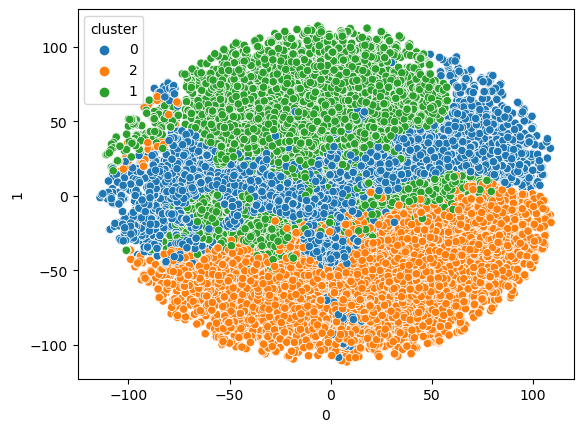

In [ ]:
sns.scatterplot(data=df_reduced, x=df_reduced[0], y=df_reduced[1], hue="cluster")

#### Conclusión

El gráfico anterior muestra que no existen clústeres naturales presentes en los datos. El algoritmo K-Means solo es capaz de hacer particiones en el conjunto de datos.